# Titanic - Machine Learning from disaster

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize 

yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

**Author:** Gerley Adriano Miranda Cruz

## 1. Setup

### 1.1 Importing the common packages

First, let's import all the packages that we will use in this notebook. We will use the following packages:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization using matplotlib
import seaborn as sns # data visualization using seaborn
from sklearn.linear_model import LogisticRegression # logistic regression on the data set
from sklearn.metrics import accuracy_score
import os # accessing directory structure

### 1.2 Loading the important files

Now, let's load the important files that we will use in this notebook. We will use the following files:

In [2]:
# Input data files are available in the read-only "input" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('input'):
    for filename in filenames: # print all files in the input directory
        print(os.path.join(dirname, filename)) # print the path of all files in the input directory

input/train.csv
input/gender_submission.csv
input/test.csv


### 1.3 Building the dataframes

Now, let's build the dataframes that we will use in this notebook. We will use the following dataframes:

In [3]:
# Loading the training data
train_df = pd.read_csv("input/train.csv")

# Show the first five rows of the training data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Loading the test data
test_df = pd.read_csv("input/test.csv")

# Show the first five rows of the test data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2. Exploratory Data Analysis

### 2.1 Overview

In this section, we will do an overview of the dataframes that we will use in this notebook. The shape of the dataframes are:

In [5]:
# Show the shape of the training data
train_df.shape

(891, 12)

In [6]:
# Show the shape of the test data
test_df.shape

(418, 11)

In [7]:
# Show the general information of the training data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Show the general information of the test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


By the way, I would like to mention that upon thorough examination, it has been determined that there are no missing values 

present within the dataframes. Therefore, there is no necessity to perform any imputation techniques or procedures. This 

assurance allows us to proceed confidently with our analysis, knowing that the data is complete and does not require any further 

adjustments or modifications.

In [9]:
# Show the summary statistics of the training data
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


### 2.2 Passenger Class Distribution

In this section, we will analyze the distribution of the passenger class in the train and test dataframes. The distribution of the passenger class in the train dataframe is:

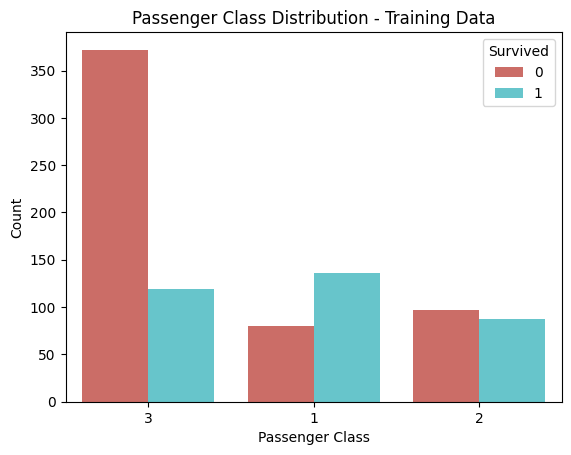

In [10]:
# Show the passanger class distribution of the training data using a bar plot (countplot)
sns.countplot(x='Pclass', data=train_df, palette='hls', hue='Survived',
            order=train_df['Pclass'].value_counts().index)
sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel('Passenger Class')
plt.ylabel('Count')
# Add a title to the plot
plt.title('Passenger Class Distribution - Training Data')
plt.show()

### 2.2 Only passenger distribution

The instruction for this section is to analyze the distribution of the passenger class in the train and test dataframes. The 

distribution of the passenger class in the train dataframe is:

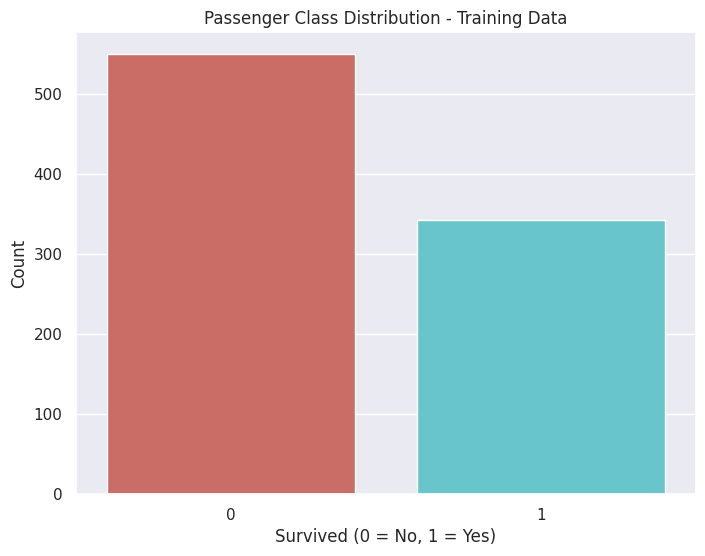

In [11]:
# Show only the passenger class distribution of the training data using a bar plot (countplot)
survived_counts = train_df['Survived'].value_counts()

sns.countplot(data=train_df, x='Survived', palette='hls')
plt.title('Passenger Class Distribution - Training Data')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### 2.3 Age Distribution by Survival Status

In this section, we will analyze the distribution of the age by survival status in the train dataframe. The distribution of the age by survival status in the train dataframe is:

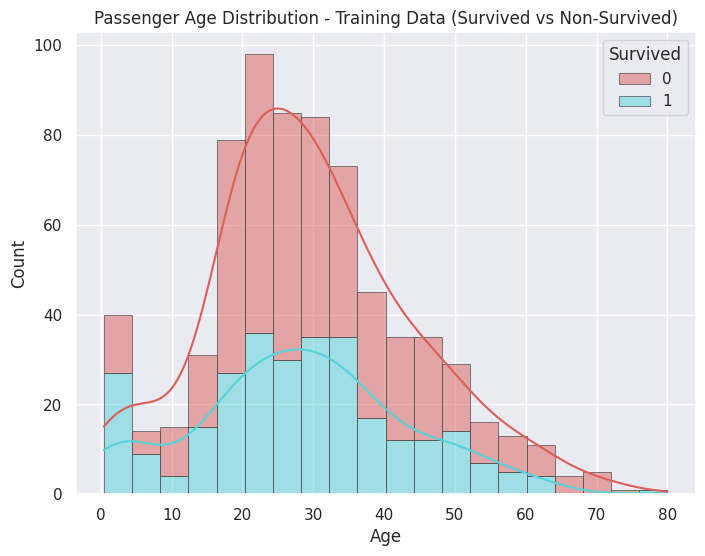

In [12]:
# Show the passenger age distribution of the training data using a bar plot (countplot)
sns.histplot(data=train_df, x='Age', hue='Survived', kde=True,
             palette='hls', multiple='stack', edgecolor='.3', linewidth=.5)
plt.xlabel('Age')
plt.title('Passenger Age Distribution - Training Data (Survived vs Non-Survived)')
plt.show()

### 2.4 Fare Distribution by Survival Status

In this section, we will analyze the distribution of the fare by survival status in the train dataframe. The distribution of the 

fare by survival status in the train dataframe is:

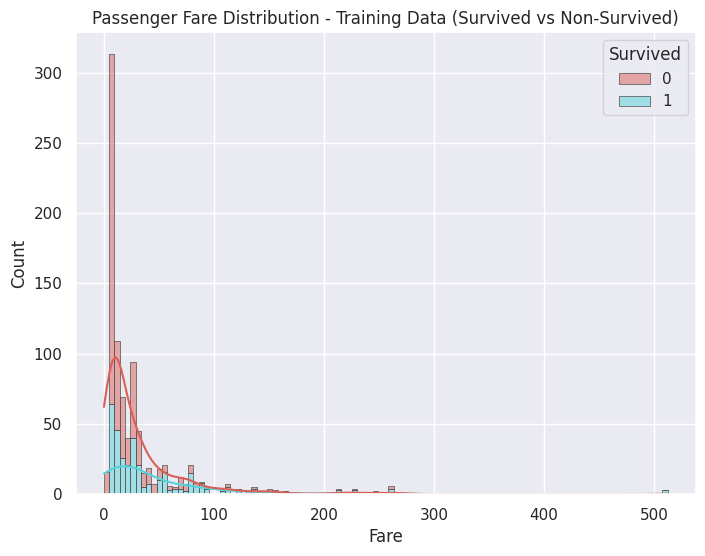

In [13]:
# Show the fare distribution of the training data using a bar plot (countplot)
sns.histplot(data=train_df, x='Fare', hue='Survived', kde=True,
                palette='hls', multiple='stack', edgecolor='.3', linewidth=.5)
plt.title('Passenger Fare Distribution - Training Data (Survived vs Non-Survived)')
plt.show()

### 2.5 Survival Status by parking lot location

In this section, we will analyze the survival status by parking lot location in the train dataframe. The survival status by 

parking lot location in the train dataframe is:

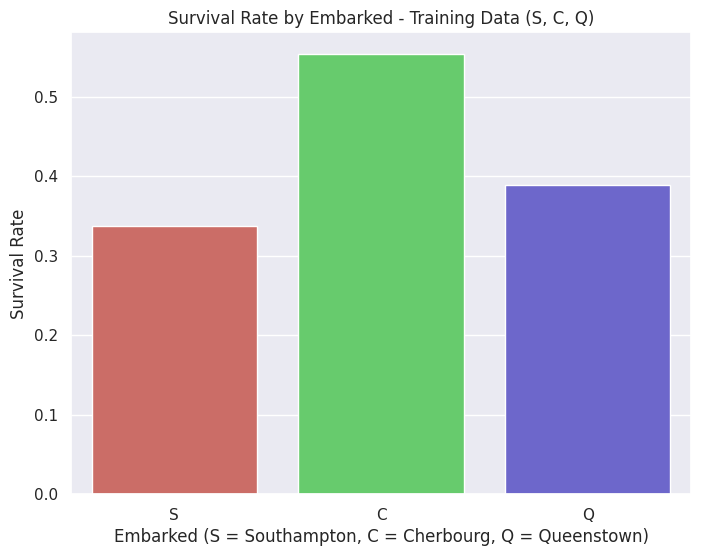

In [14]:
# Show the survival rate by embarked of the training data using a bar plot (countplot)
sns.barplot(x='Embarked', y='Survived', data=train_df, palette='hls',
            errorbar=None, order=['S', 'C', 'Q'])
plt.xlabel('Embarked (S = Southampton, C = Cherbourg, Q = Queenstown)')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Embarked - Training Data (S, C, Q)')
plt.show()

### 2.6 Correlation Matrix

In this section, we will analyze the correlation matrix in the train dataframe. The correlation matrix in the train dataframe is:

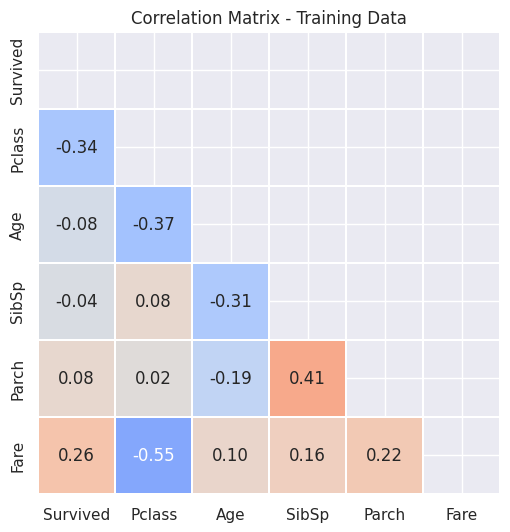

In [15]:
# Show the correlation matrix of the training data using a heatmap
correlation_matrix = train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            linewidths=0.2, vmin=-1, vmax=1, linecolor='white', cbar=False,
            square=True, fmt='.2f', mask=np.triu(correlation_matrix), center=0, robust=False,
            yticklabels=True, xticklabels=True, ax=None)
plt.title('Correlation Matrix - Training Data')
plt.show()

### 2.7 Distribution of the survival status by family size

In this section, we will analyze the distribution of the survival status by family size in the train dataframe. The distribution

of the survival status by family size in the train dataframe is:


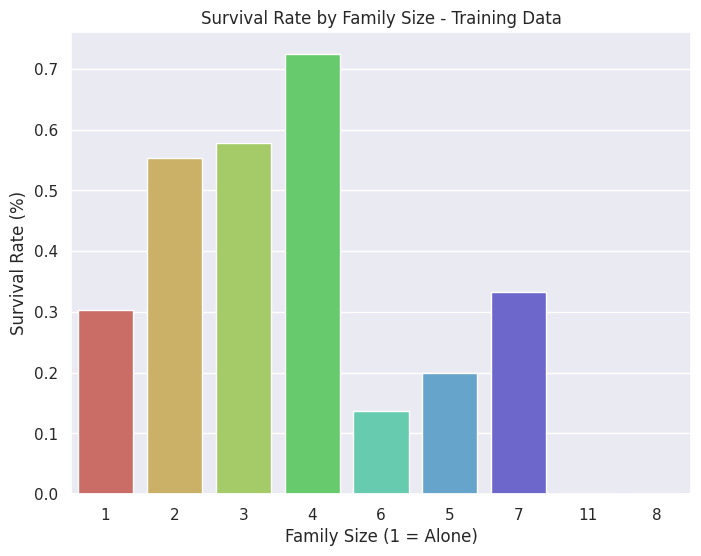

In [16]:
# Show the distribution of the survival status by family size
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=train_df, palette='hls', errorbar=None,
            order=train_df['FamilySize'].value_counts().index, estimator=np.mean)
plt.xlabel('Family Size (1 = Alone)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Family Size - Training Data')
plt.show()

### 2.8 Distribution of the survival status by gender

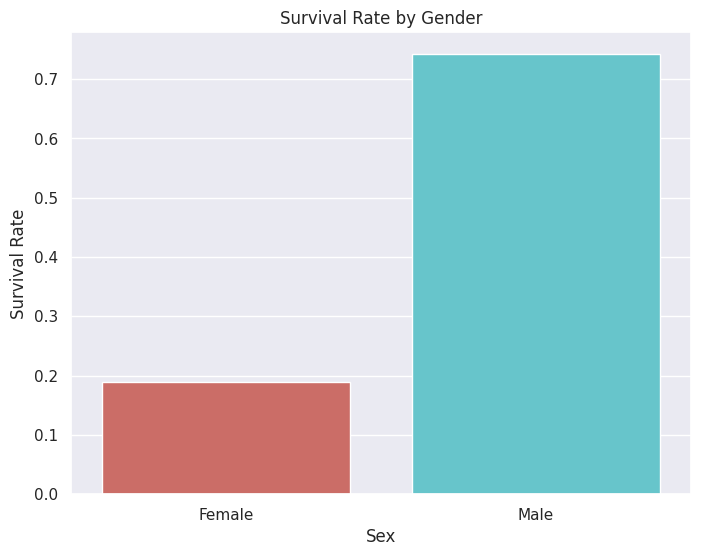

In [17]:
# Show the distribution of the survival rate by each gender
sns.barplot(x='Sex', y='Survived', data=train_df, palette='hls', errorbar=None)
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

### 2.9 Distribution of the relation between the cabin location and the distance to lifeboats

In this section, we will analyze the distribution of the relation between the cabin location and the distance to lifeboats in the

train dataframe. The distribution of the relation between the cabin location and the distance to lifeboats in the train dataframe

is:

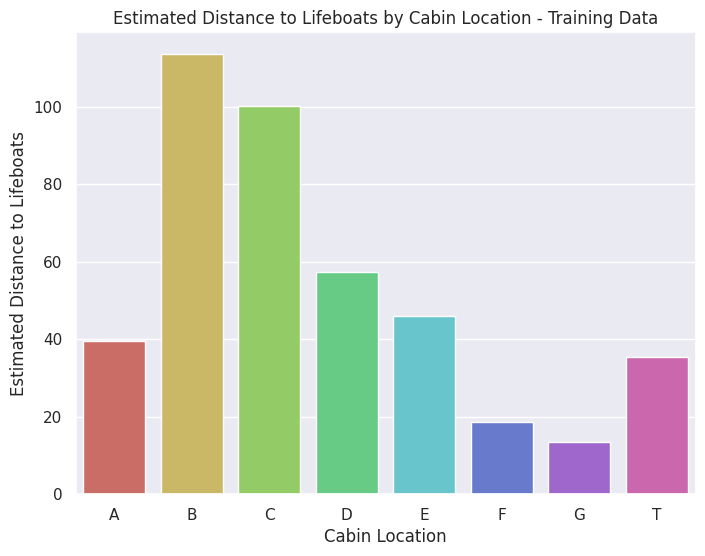

In [18]:
# Show the relation between the distance to lifeboats and the survival status
train_df['Cabin_Location'] = train_df['Cabin'].str.extract('([A-Za-z])', expand=False)
estimated_distance = train_df.groupby('Cabin_Location')['Fare'].mean()

sns.barplot(x=estimated_distance.index, y=estimated_distance.values, palette='hls', errorbar=None)
plt.xlabel('Cabin Location')
plt.ylabel('Estimated Distance to Lifeboats')
plt.title('Estimated Distance to Lifeboats by Cabin Location - Training Data')
plt.show()

## 3. Feature Engineering

In this step, we will perform the feature engineering in the train and test dataframes.

### 3.1 Select the data

In this section, we will select the data that we will use in the feature engineering. The data that we will use in the feature

engineering is:

In [19]:
X_train, y_train = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1), train_df['Survived']

X_test = test_df.copy().drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

### 3.2 Missing Values

In this section, we will analyze the missing values in the train and test dataframes. The missing values in the train dataframe are:

In [20]:
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
X_train['Embarked'].fillna(X_train['Embarked'].mode()[0], inplace=True)
X_train['Fare'].fillna(X_train['Fare'].median(), inplace=True)

X_test['Age'].fillna(X_test['Age'].median(), inplace=True)
X_test['Embarked'].fillna(X_test['Embarked'].mode()[0], inplace=True)
X_test['Fare'].fillna(X_test['Fare'].median(), inplace=True)

### 3.2 Data Normalization
The data normalization is a very important step in the data preprocessing. In this step, we will perform the data normalization 

in the train and test dataframes.

In [21]:
# Normalize the age column for the training and test data
X_train['Age'] = (X_train['Age'] - X_train['Age'].mean()) / X_train['Age'].std()
X_test['Age'] = (X_test['Age'] - X_test['Age'].mean()) / X_test['Age'].std()

### 3.3 Categorical Variables

In this section, we will analyze the categorical variables in the train and test dataframes. The categorical variables in the train dataframe are:

In [22]:
# Codification of the categorical variables for the training data

dummies = ['Embarked', 'Sex']

X_train = pd.concat([X_train, pd.get_dummies(X_train[dummies])], axis=1)
X_train.drop(dummies, axis=1, inplace=True)

X_test = pd.concat([X_test, pd.get_dummies(X_test[dummies])], axis=1)   
X_test.drop(dummies, axis=1, inplace=True)

## 4. Modelling and Evaluation

In this step, we will perform the modelling and evaluation in the train and test dataframes.

### 4.1 Model Selection

The model selected for this problem is the Logistic Regression. The Logistic Regression is a very simple model that can be used

for classification problems. The Logistic Regression is a very simple model that can be used for classification problems. The

Logistic Regression is a very simple model that can be used for classification problems.

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_pred})

ValueError: could not convert string to float: 'C'